Best L2 regularization parameter: 0.04832930238571752


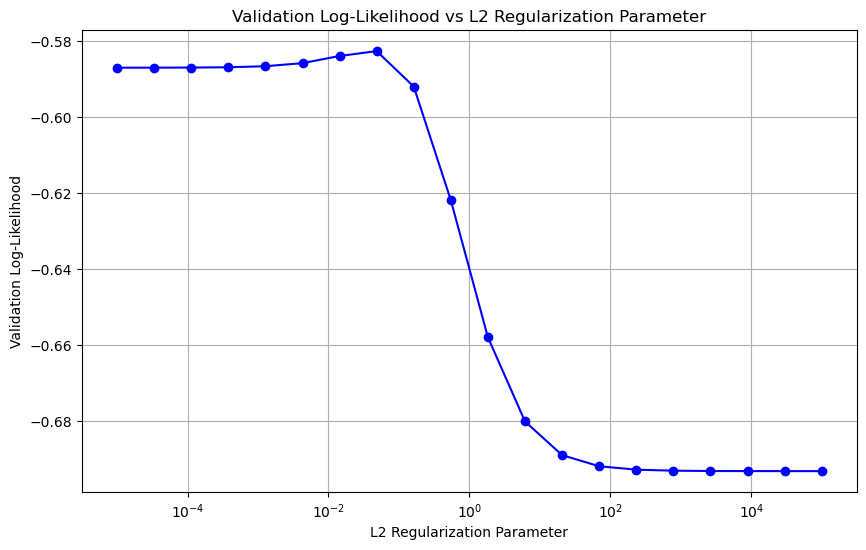

Final Validation Accuracy: 0.7450


In [20]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def f_objective(theta, X, Y, l2_param=1):
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        l2_param: regularization parameter

    Returns:
        objective: scalar value of objective function
    '''
    n_samples = X.shape[0]
    z = np.dot(X, theta)
    log_term = np.logaddexp(0, z)
    neg_log_likelihood = np.sum(log_term - Y * z) / n_samples
    l2_regularization = 0.5 * l2_param * np.sum(theta**2)
    return neg_log_likelihood + l2_regularization

def fit_logistic_reg(X, y, objective_function, l2_param=1):
    '''
    Args:
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        objective_function: function returning the value of the objective
        l2_param: regularization parameter
        
    Returns:
        optimal_theta: 1D numpy array of size num_features
    '''
    num_features = X.shape[1]
    initial_theta = np.zeros(num_features)
    result = minimize(
        fun=lambda theta: objective_function(theta, X, y, l2_param),
        x0=initial_theta,
        method='L-BFGS-B'
    )
    return result.x

# Load and preprocess data
X_train = np.genfromtxt('/Users/tapankhaladkar/Machine Learning/hw2/X_train.txt', delimiter=',')
y_train = np.genfromtxt('/Users/tapankhaladkar/Machine Learning/hw2/y_train.txt', delimiter=',')
X_val = np.genfromtxt('/Users/tapankhaladkar/Machine Learning/hw2/X_val.txt', delimiter=',')
y_val = np.genfromtxt('/Users/tapankhaladkar/Machine Learning/hw2/y_val.txt', delimiter=',')

X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)
X_train_standardized = (X_train - X_train_mean) / X_train_std
X_val_standardized = (X_val - X_train_mean) / X_train_std

X_train_processed = np.hstack([np.ones((X_train.shape[0], 1)), X_train_standardized])
X_val_processed = np.hstack([np.ones((X_val.shape[0], 1)), X_val_standardized])

# Function to compute validation log-likelihood
def compute_val_log_likelihood(theta, X, y):
    n_samples = X.shape[0]
    z = np.dot(X, theta)
    log_term = np.logaddexp(0, z)
    return -np.sum(log_term - y * z) / n_samples  # Negative because we want to maximize log-likelihood

# Test different L2 regularization parameters
l2_params = np.logspace(-5, 5, 20)
val_log_likelihoods = []

for l2_param in l2_params:
    theta = fit_logistic_reg(X_train_processed, y_train, f_objective, l2_param)
    val_log_likelihood = compute_val_log_likelihood(theta, X_val_processed, y_val)
    val_log_likelihoods.append(val_log_likelihood)

# Find the best L2 parameter
best_l2_param = l2_params[np.argmax(val_log_likelihoods)]
print(f"Best L2 regularization parameter: {best_l2_param}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(l2_params, val_log_likelihoods, 'b-o')
plt.xlabel('L2 Regularization Parameter')
plt.ylabel('Validation Log-Likelihood')
plt.title('Validation Log-Likelihood vs L2 Regularization Parameter')
plt.grid(True)
plt.show()

# Train the final model with the best L2 parameter
final_theta = fit_logistic_reg(X_train_processed, y_train, f_objective, best_l2_param)

# Compute final validation accuracy
y_val_pred = 1 / (1 + np.exp(-np.dot(X_val_processed, final_theta)))
y_val_pred_binary = (y_val_pred >= 0.5).astype(int)
val_accuracy = np.mean(y_val_pred_binary == y_val)
print(f"Final Validation Accuracy: {val_accuracy:.4f}")

Best L2 regularization parameter: 0.04832930238571752
Calibration Table:
   Bin Center  Fraction of Positives  Bin Size
0        0.05               0.250000         4
1        0.15               0.384615        13
2        0.25               0.227273        66
3        0.35               0.282051        78
4        0.45               0.338235        68
5        0.55               0.666667        39
6        0.65               0.846154        39
7        0.75               0.829268        41
8        0.85               0.787879        33
9        0.95               0.842105        19


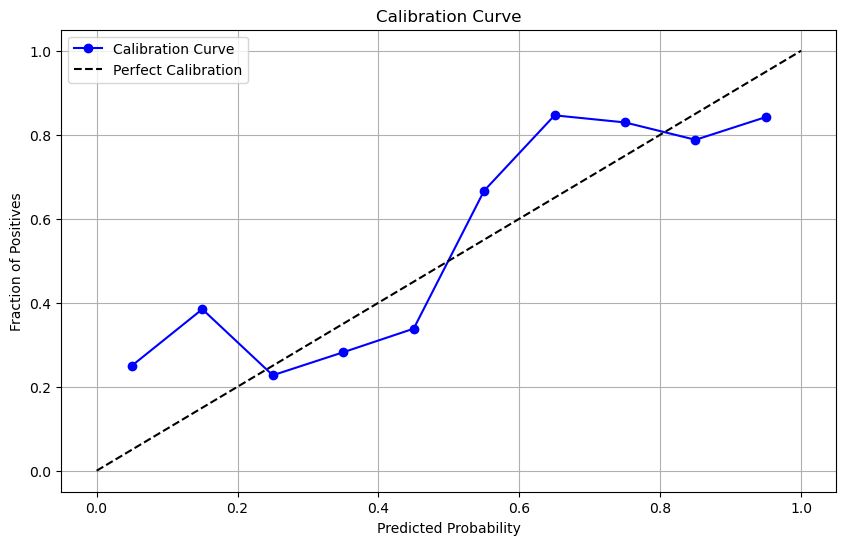

Final Validation Accuracy: 0.7450


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

# Define the objective function (log-likelihood + L2 regularization)
def f_objective(theta, X, y, l2_param=1):
    n_samples = X.shape[0]
    z = np.dot(X, theta)
    log_term = np.logaddexp(0, z)
    neg_log_likelihood = np.sum(log_term - y * z) / n_samples
    l2_regularization = 0.5 * l2_param * np.sum(theta ** 2)
    return neg_log_likelihood + l2_regularization

# Fit the logistic regression model using L-BFGS-B optimizer
def fit_logistic_reg(X, y, objective_function, l2_param=1):
    num_features = X.shape[1]
    initial_theta = np.zeros(num_features)
    result = minimize(
        fun=lambda theta: objective_function(theta, X, y, l2_param),
        x0=initial_theta,
        method='L-BFGS-B'
    )
    return result.x

# Load and preprocess data
X_train = np.genfromtxt('/Users/tapankhaladkar/Machine Learning/hw2/X_train.txt', delimiter=',')
y_train = np.genfromtxt('/Users/tapankhaladkar/Machine Learning/hw2/y_train.txt', delimiter=',')
X_val = np.genfromtxt('/Users/tapankhaladkar/Machine Learning/hw2/X_val.txt', delimiter=',')
y_val = np.genfromtxt('/Users/tapankhaladkar/Machine Learning/hw2/y_val.txt', delimiter=',')

# Standardize the data
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)
X_train_standardized = (X_train - X_train_mean) / X_train_std
X_val_standardized = (X_val - X_train_mean) / X_train_std

# Add bias term (column of ones)
X_train_processed = np.hstack([np.ones((X_train.shape[0], 1)), X_train_standardized])
X_val_processed = np.hstack([np.ones((X_val.shape[0], 1)), X_val_standardized])

# Find the best L2 regularization parameter
l2_params = np.logspace(-5, 5, 20)
val_log_likelihoods = []

for l2_param in l2_params:
    theta = fit_logistic_reg(X_train_processed, y_train, f_objective, l2_param)
    z = np.dot(X_val_processed, theta)
    log_term = np.logaddexp(0, z)
    val_log_likelihood = -np.sum(log_term - y_val * z) / len(y_val)  # Negative log-likelihood
    val_log_likelihoods.append(val_log_likelihood)

# Select the best L2 parameter
best_l2_param = l2_params[np.argmax(val_log_likelihoods)]
print(f"Best L2 regularization parameter: {best_l2_param}")

# Train the final model using the best L2 parameter
final_theta = fit_logistic_reg(X_train_processed, y_train, f_objective, best_l2_param)

# Compute predicted probabilities on the validation set
y_val_pred_probs = 1 / (1 + np.exp(-np.dot(X_val_processed, final_theta)))

# Define the number of bins for calibration
num_bins = 10
bins = np.linspace(0.0, 1.0, num_bins + 1)

# Initialize lists to store bin information
bin_centers = []
percent_positive = []
bin_sizes = []

# Group predictions into bins and compute fraction of positives
for i in range(num_bins):
    bin_indices = np.where((y_val_pred_probs >= bins[i]) & (y_val_pred_probs < bins[i + 1]))[0]
    bin_center = (bins[i] + bins[i + 1]) / 2
    bin_centers.append(bin_center)

    if len(bin_indices) > 0:
        positive_count = np.sum(y_val[bin_indices])
        fraction_positive = positive_count / len(bin_indices)
        percent_positive.append(fraction_positive)
        bin_sizes.append(len(bin_indices))
    else:
        percent_positive.append(np.nan)
        bin_sizes.append(0)

# Create a calibration table
calibration_table = pd.DataFrame({
    'Bin Center': bin_centers,
    'Fraction of Positives': percent_positive,
    'Bin Size': bin_sizes
})

# Display the calibration table
print("Calibration Table:")
print(calibration_table)

# Plot the calibration curve
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, percent_positive, 'b-o', label='Calibration Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Compute final validation accuracy
y_val_pred_binary = (y_val_pred_probs >= 0.5).astype(int)
val_accuracy = np.mean(y_val_pred_binary == y_val)
print(f"Final Validation Accuracy: {val_accuracy:.4f}")
